# Project: Investigate a No-Show Appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I've selected 'No-Show' Database. This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointments.

I was interested to see correlation and trying to identify the reason behind missed appointments.

I see one dependent variable : 
- 'No-Show' - which indicates missed or taken appointment.

and 8 independent variables:
<li><a href="#gen">Gender</a></li>
<li><a href="#age">Age</a></li>
<li><a href="#sms">SMS</a></li>
<li><a href="#diab">Diabetes</a></li>
<li><a href="#schol">Scholarship</a></li>
<li><a href="#alc">Alcoholism</a></li>
<li><a href="#week">Day of the week</a></li>
<li><a href="#hosp">Hospital</a></li>



I's also try to chechk how gender and day of weeks or month affected 'No-Show' variable.
I want to answer the questions:

How do 
- Age
- Gender
- Scholarship
- Day of the week
- Diabetes
- Alcoholism
- Received sms
help us to predict if appointment would be missed or not.
Is any of these variables affect our dependent variable more than others.

In [60]:
#import necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


First I need:
- to import all modules
- to read the file
- to have a look at the file to understand the data (`.head()` gives us first 5 rows)

In [61]:
#reading the file and checking the first row to get idea about dataset

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


No I'd check the type of cells in each column and see if any column has missing values.

In [62]:
# check number of columns and rows
df.shape

(110527, 14)

In [63]:
# check missed values and values types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


According to the query we don't have any missing values.
We also have Date columns ('ScheduledDay' and 'AppointmentDay') type object, which is a string in this case.
So if we want to work with date type we need to convert these columns into date type.
For that we have:
- import datetime module
- convert type 

In [64]:
#import datetime module to extract date month , day, year from the ScheduledDay and AppointmentDay
import datetime

In [65]:
# changing types of these columns
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

We need to check types again to be sure the convertion worked as planned.

In [66]:
#check if we actually changed ScheduledDay and AppointmentDay type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


Indeed now `ScheduledDay` and `AppointmentDay` now have type `datetime64[ns]`

Now we want to use date information by getting Day, Month and Year from the `ScheduledDay` and `AppointmentDay` column data.

In [67]:
# extracting year, month, day, day of the week from ScheduledDay column
df['SchedYear'], df['SchedMonth'], df['SchedDay'], df['SchedWeekday'] = df['ScheduledDay'].dt.year, df['ScheduledDay'].dt.month,df['ScheduledDay'].dt.day, df['ScheduledDay'].dt.dayofweek

In [68]:
# extracting year, month, day, day of the week from AppointmentDay column
df['AppYear'], df['AppMonth'], df['AppDay'] = df['AppointmentDay'].dt.year, df['AppointmentDay'].dt.month,df['AppointmentDay'].dt.day

In order to check appointments by name of the day of the week, we use `.datetime.srtftime` module and get the name.

In [69]:
# getting the name of the day of week
df['SchedWeekDay'] = df[['ScheduledDay']].apply(lambda x: datetime.datetime.strftime(x['ScheduledDay'], '%A'), axis=1)

We'll also add column which converts `Yes` into `1` and `No` into `0` for missed appointments.

In [70]:
# adding column which converts Yes into 1 and No into 0 for missed appointments.
df['NoShowInt'] = df['No-show'].apply(lambda x: 0 if x == 'No' else 1)

Now we'll check that we added proper columns and they have proper type `int64` and `object` for the day name. Yes, they do.
In order to check if there are any missed values we can also use `.isnull().sum()`

In [71]:
# if there are any missed values we can also use .isnull().sum()
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
SchedYear         0
SchedMonth        0
SchedDay          0
SchedWeekday      0
AppYear           0
AppMonth          0
AppDay            0
SchedWeekDay      0
NoShowInt         0
dtype: int64

### Data Cleaning (Dropping columns)

We see that PatientId and AppointmentId are irrelevant for our analysis so we'll drop these columns.


In [72]:
#PatientId and AppointmentId are irrelevant for our analysis so we'll drop these columns
df.drop(['PatientId','AppointmentID'], axis=1, inplace = True)

Let's check that we removed these columns.

In [73]:
#check that we removed these columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 21 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
SchedYear         110527 non-null int64
SchedMonth        110527 non-null int64
SchedDay          110527 non-null int64
SchedWeekday      110527 non-null int64
AppYear           110527 non-null int64
AppMonth          110527 non-null int64
AppDay            110527 non-null int64
SchedWeekDay      110527 non-null object
NoShowInt         110527 non-null int64
dtypes: datetime64[ns](2), 

Let's check how the table look like. Yes, all additional columns (date, name of the day, missed appointment (1/0) look as planned.

In [74]:
# check that  all additional columns (date, name of the day, missed appointment (1/0) look as planned.
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,...,No-show,SchedYear,SchedMonth,SchedDay,SchedWeekday,AppYear,AppMonth,AppDay,SchedWeekDay,NoShowInt
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,...,No,2016,4,29,4,2016,4,29,Friday,0


<a id='eda'></a>
## Exploratory Data Analysis

Let's analyze data and check percentiles, min, max and mean and st.deviation.

In [75]:
# first glance at data analysis and check percentiles, min, max and mean and st.deviation
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,SchedYear,SchedMonth,SchedDay,SchedWeekday,AppYear,AppMonth,AppDay,NoShowInt
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.0,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,2015.999439,4.823871,14.252228,1.851955,2016.0,5.210048,12.499398,0.201933
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.023678,0.715801,9.345629,1.378520,0.0,0.473780,9.056482,0.401444
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,2016.0,4.000000,1.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,4.000000,6.000000,1.000000,2016.0,5.000000,5.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,5.000000,13.000000,2.000000,2016.0,5.000000,10.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2016.000000,5.000000,22.000000,3.000000,2016.0,5.000000,19.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,2016.000000,12.000000,31.000000,5.000000,2016.0,6.000000,31.000000,1.000000


We see:
- Average age is 37.09 yo,
- Scholarship mean is almost 0.1, so only 10% of patient had scholarship for medical insurance,
- Only 7% of people had Diabetes,
- 3% people had Alcoholism,
- Almost 20% had Hipertention,
So Hipertention is the most common medical condition among observed. 
- 32% of people received SMS,
- 2% patients Handicaped,
- at average 20% of patients missed their appointments.

Mistakes:
- Age min is -1 which is impossible
- Handcap value max is 4 which is impossible too as value could be either 1 or 0.
Need to check rows with wrong data

Doubts:
- Age max is 115 which theoretically possible as oldest known person has lived up to 122 yo


In [76]:
# check all rows with Age lower than 0

wrongAge = df.query('Age < 0')
wrongAge

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,...,No-show,SchedYear,SchedMonth,SchedDay,SchedWeekday,AppYear,AppMonth,AppDay,SchedWeekDay,NoShowInt
99832,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,...,No,2016,6,6,0,2016,6,6,Monday,0


In [77]:
# check all rows with Handcap value greater than 1

wrongHandcap = df.query('Handcap > 1')
wrongHandcap

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,...,No-show,SchedYear,SchedMonth,SchedDay,SchedWeekday,AppYear,AppMonth,AppDay,SchedWeekDay,NoShowInt
946,M,2016-04-14 09:26:08,2016-04-29,94,BELA VISTA,0,1,1,0,2,...,No,2016,4,14,3,2016,4,29,Thursday,0
1665,M,2016-03-30 09:16:41,2016-04-29,64,SANTA MARTHA,0,1,0,1,2,...,No,2016,3,30,2,2016,4,29,Wednesday,0
1666,M,2016-03-30 09:16:41,2016-04-29,64,SANTA MARTHA,0,1,0,1,2,...,No,2016,3,30,2,2016,4,29,Wednesday,0
2071,M,2016-04-29 10:08:48,2016-04-29,64,SANTA MARTHA,0,1,0,1,2,...,No,2016,4,29,4,2016,4,29,Friday,0
2091,F,2016-04-29 08:13:59,2016-04-29,11,ANDORINHAS,0,0,0,0,2,...,No,2016,4,29,4,2016,4,29,Friday,0
2213,F,2016-04-29 11:22:50,2016-04-29,29,VILA RUBIM,0,0,0,0,2,...,No,2016,4,29,4,2016,4,29,Friday,0
2214,M,2016-04-29 11:22:20,2016-04-29,55,DO QUADRO,0,0,0,0,3,...,No,2016,4,29,4,2016,4,29,Friday,0
2673,M,2016-04-15 13:06:05,2016-04-29,17,SANTA TEREZA,0,0,0,0,2,...,No,2016,4,15,4,2016,4,29,Friday,0
5424,M,2016-05-02 13:24:36,2016-05-04,65,SANTO ANDRÉ,0,1,1,1,2,...,Yes,2016,5,2,0,2016,5,4,Monday,1
5467,F,2016-05-12 09:10:28,2016-05-16,10,BENTO FERREIRA,0,0,0,0,2,...,No,2016,5,12,3,2016,5,16,Thursday,0


Need to make conditional drop of rows with wrong values:

`1` with wrong `Age` 

`199` with wrong `Handcap`

We can drop them as the total number of wrong rows `200` is insignificant comparing to the total number of rows : ` 111 527` 

In [78]:
# to drop row with wron Age
df.drop(df[df.Age < 0].index, inplace=True)

In [79]:
# to drop row with wron Handcap
df.drop(df[df.Handcap > 1].index, inplace=True)

In [80]:
# to check if we have all correct values or looking correct
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,SchedYear,SchedMonth,SchedDay,SchedWeekday,AppYear,AppMonth,AppDay,NoShowInt
count,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.0,110327.000000,110327.000000,110327.000000
mean,37.070753,0.098281,0.196833,0.071605,0.030382,0.018509,0.321182,2015.999438,4.823806,14.252667,1.852067,2016.0,5.210094,12.499361,0.201927
std,23.098052,0.297695,0.397607,0.257834,0.171638,0.134782,0.466932,0.023699,0.715840,9.345836,1.378527,0.0,0.473767,9.056694,0.401440
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,2016.0,4.000000,1.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,4.000000,6.000000,1.000000,2016.0,5.000000,5.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,5.000000,13.000000,2.000000,2016.0,5.000000,10.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2016.000000,5.000000,22.000000,3.000000,2016.0,5.000000,19.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2016.000000,12.000000,31.000000,5.000000,2016.0,6.000000,31.000000,1.000000


In [81]:
# to check if number of rows reduced

df.shape

(110327, 21)

Everything is correct:

min `Age` is `0`

max `Handcap` is `1`

number of rows decreased by `200` and now is `110 327` instead of `110 527`

In [82]:
# to check total number of rows

df.Scholarship.count()

110327

In [83]:
# to create Gender subsets for male and female

total_gender = df['Gender'].value_counts()
male = df.query('Gender == "M"')
female = df.query('Gender == "F"')
total_gender
total_gender.sum()
# male.count().max()
# female.count().max()

110327

In [84]:
# to calculate the proportion of men and women in total
proportion_male = male.count().max()/total_gender.sum()
proportion_female = female.count().max()/total_gender.sum()
'male', "{0:.2f}".format(proportion_male), 'female', "{0:.2f}".format(proportion_female)

('male', '0.35', 'female', '0.65')

<a id="gen"></a>
    
### Research Question 1 (Gender infuence)

As we see from queries men are 35% of patients and women are 65% of patients.

Now let's check what is proportion of men and women have missed their appointments.

At first we create two subsets: `shownUp` and `notShownUp` for people who came and who missed appointments respectively.

In [85]:
# to create condition for shown up patients and those who missed the appointments
shownUp = df.NoShowInt == False
notShownUp = df.NoShowInt == True

In [86]:
# to calculate the proportion of men and women who missed their appointments
maleNoShow = male.NoShowInt.sum()
femaleNoShow = female.NoShowInt.sum()
propMnoShow = maleNoShow / male.Age.count()
propFnoShow = femaleNoShow/female.Age.count()
'proportion men no show', "{0:.2f}".format(propMnoShow), 'proportion female no show', "{0:.2f}".format(propFnoShow)

('proportion men no show', '0.20', 'proportion female no show', '0.20')

As we see despite different numbers of appointments for men and women the same proportion of men and women have missed their appointment: 0.2 .
So unlikely this variable affect missed appointments.

In [87]:
#to check the total numbers of women and men who missed their appointments
'men no show and total', maleNoShow, male.Age.count(), 'female no show and total', femaleNoShow, female.Age.count()

('men no show and total',
 7710,
 38597,
 'female no show and total',
 14568,
 71730)

Let's check absolute numbers. Everything is correct, even without calculation it's clear that about 1/5 of appointments were missed for both genders.

<a id="age"></a>
    
### Research Question 2 (Age infuence)

Now let's check the `Age` between men and women. 
At the histogram we see that men's histogram is positively skewed with mode age 0-10 years old, then almost evenly distributed between 10 and 60 years old and then significantly decreasing.
We could guess that peak at the age 0-10 y is happened mostly because these patients were brought by parents and had to come for regular appointments (probably school age mandatory appointments too).

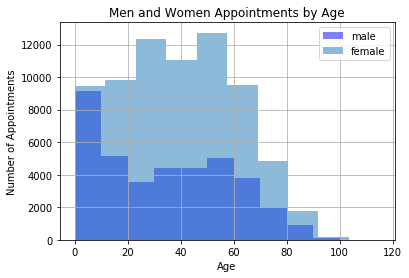

In [88]:
# to visualize number of appintments for men and women by age

male.Age.hist(alpha=0.5, color='blue', label='male')
female.Age.hist(alpha=0.5, label='female')

plt.ylabel('Number of Appointments')
plt.xlabel('Age')
plt.title("Men and Women Appointments by Age")
plt.legend()

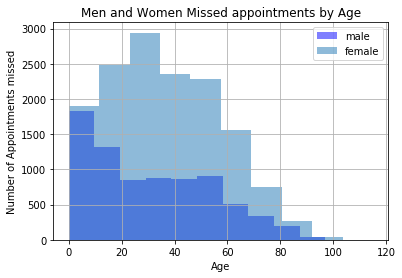

In [89]:
# to visualize number of missed appintments for men and women by age

male.query('NoShowInt==1').Age.hist(alpha=0.5, color='blue', label='male')
female.query('NoShowInt==1').Age.hist(alpha=0.5, label='female')
plt.ylabel('Number of Appointments missed')
plt.xlabel('Age')
plt.title("Men and Women Missed appointments by Age")
plt.legend()

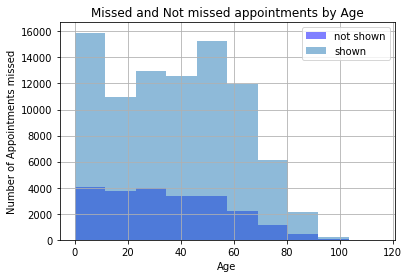

In [90]:
# to compare missed and not missed appointments by Age
df[notShownUp].Age.hist(alpha = 0.5, color='blue', label = 'not shown') # 1- did not show up
df[shownUp].Age.hist(alpha = 0.5, label = 'shown')
plt.ylabel('Number of Appointments missed')
plt.xlabel('Age')
plt.title("Missed and Not missed appointments by Age")

plt.legend()

Women's `Age` is almost normally distrubuted with mode at 40 years old.
At histogram with missed appoinments we see that both men and women histogram are keeping their shape with female distribution getting narrow.
It could be related with child bearing before mode age and some sickness after - will check for `Diabetes` and `Hipertension` later.

<a id="sms"></a>
    
### Research Question 3 (SMS received)

Now we'll check how SMS received or not received affected missed appointments.


In [91]:
# to make subsets of patients who received and not received SMS

SMS = df.query('SMS_received == 1')
noSMS = df.query('SMS_received == 0')
# SMS.head(2)

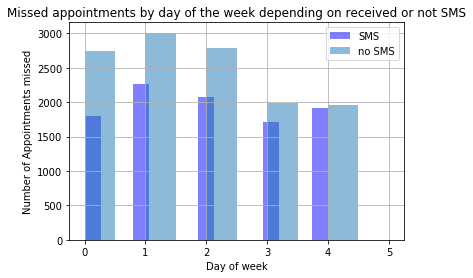

In [92]:
# to visualize missed appoinments with patients who received and not received  by day of the week

SMS[SMS.NoShowInt==1].SchedWeekday.hist(alpha=0.5, color='blue',bins = 15, label='SMS')
noSMS[noSMS.NoShowInt==1].SchedWeekday.hist(alpha=0.5, label='no SMS')
plt.ylabel('Number of Appointments missed')
plt.xlabel('Day of week')
plt.title("Missed appointments by day of the week depending on received or not SMS")

plt.legend()

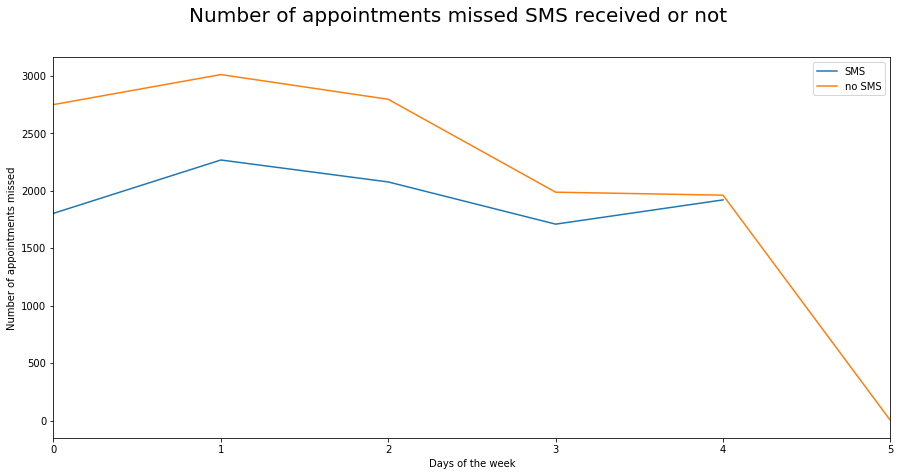

In [93]:
# to visualize missed appoinments with patients who received and not received SMS by day of the week

SMSnoShow = SMS.query('NoShowInt==1')
noSMSnoShow = noSMS.query('NoShowInt==1')
fig, ax = plt.subplots(figsize=(15,7))
fig.suptitle('Number of appointments missed SMS received or not', fontsize=20)
SMSnoShow.groupby(['SchedWeekday']).count()['Age'].plot(ax=ax, label = 'SMS')
noSMSnoShow.groupby(['SchedWeekday']).count()['Age'].plot(ax=ax, label = 'no SMS')
ax.set_xlabel('Days of the week')
ax.set_ylabel('Number of appointments missed')
plt.legend()

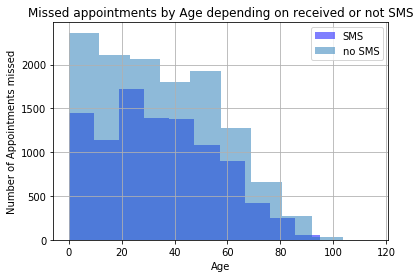

In [94]:
# to visualize missed appoinments with patients who received and not received SMS by Age

SMS[SMS.NoShowInt==1].Age.hist(alpha=0.5, color='blue', label='SMS')
noSMS[noSMS.NoShowInt==1].Age.hist(alpha=0.5, label='no SMS')

plt.ylabel('Number of Appointments missed')
plt.xlabel('Age')
plt.title("Missed appointments by Age depending on received or not SMS")

plt.legend()

We see that missed SMS mostly affected patients at the beginning of the week and before 60 yo.
There is the chance that after 60 people mostly relay on written reminders.

Let's check absolute numbers in SMS received and proportion of appointments missed with SMS received and without.

In [95]:
# check number of patients received SMS
df['SMS_received'].sum()

35435

In [97]:
# calculate the proportion of missed appoinments with SMS and without

'SMS no show', SMSnoShow['NoShowInt'].sum() , 'no SMS no show', noSMSnoShow['NoShowInt'].sum(), 'total no show', df['NoShowInt'].sum()
'proportion SMS no show', "{0:.2f}".format(SMSnoShow['NoShowInt'].sum()/df['NoShowInt'].sum()), 'proportion no SMS no show', "{0:.2f}".format(noSMSnoShow['NoShowInt'].sum()/df['NoShowInt'].sum())

('proportion SMS no show', '0.44', 'proportion no SMS no show', '0.56')

Yes, variable `SMS` affects missed appointments:
44% of patients received SMS have not shown up and
56% of patients who didn't receieved SMS not shown up.

<a id="diab"></a>
    
### Research Question 4 (Diabetes)

Now let's check how `Diabetes` and `Scholarship` affect missed appointments.

In [98]:
# to calculate Gender subsets with Diabetes and without

femaleDiabetes = female.query('Diabetes == 1')
femaleNoDiabetes = female.query('Diabetes == 0')
maleDiabetes = male.query('Diabetes == 1')
maleNoDiabetes = male.query('Diabetes == 0')

femaleDiabetesNoShow = femaleDiabetes.query('NoShowInt==1')
maleDiabetesNoShow = maleDiabetes.query('NoShowInt==1')

"female Diabetes", "{0:.2f}".format(femaleDiabetes.Age.count()/female.Age.count()), "male Diabetes", "{0:.2f}".format(maleDiabetes.Age.count()/male.Age.count())

('female Diabetes', '0.08', 'male Diabetes', '0.06')

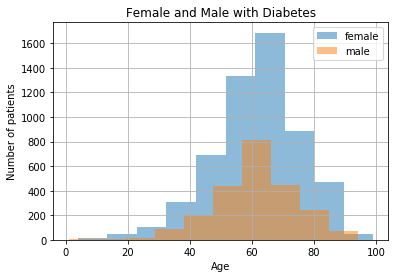

In [111]:
# histogram to visualize male and female patients with Diabetes by Age

femaleDiabetes.Age.hist(alpha=0.5, label='female')
maleDiabetes.Age.hist(alpha=0.5, label='male')

plt.ylabel('Number of patients')
plt.xlabel('Age')
plt.title("Female and Male with Diabetes")

plt.legend()

In [100]:
# proportion of men and women with Diabetes who missed their Appoinments
"female Diabetes No Show", "{0:.2f}".format(femaleDiabetesNoShow.Age.count()/femaleDiabetes.Age.count()), "male Diabetes No Show", "{0:.2f}".format(maleDiabetesNoShow.Age.count()/maleDiabetes.Age.count())

('female Diabetes No Show', '0.18', 'male Diabetes No Show', '0.18')

Just as a reminder the proportion of missed appointments for men and women are:

`'proportion men no show', '0.20', 'proportion female no show', '0.20'`

As we see the proportion of male and female who had diabetes and missed their appointments (calculated for Diabetes patients) are less than total average for missed appointments (`0.18 vs 0.2`)

<a id="schol"></a>
    
### Research Question 5 (Scholarship)

Let's check how Scholarship affected missed appointments.

In [101]:
#To calculate Gender subsets wiht Diabetes and Not With Scholarship and without

femaleDiabetesScholarship = femaleDiabetes.query('Scholarship == 1')
femaleDiabetesNoScholarship = femaleDiabetes.query('Scholarship == 0')
femaleNoDiabetesScholarship = femaleNoDiabetes.query('Scholarship == 1')
femaleNoDiabetesNoScholarship = femaleNoDiabetes.query('Scholarship == 0')
maleDiabetesScholarship = maleDiabetes.query('Scholarship == 1')
maleDiabetesNoScholarship = maleDiabetes.query('Scholarship == 0')
maleNoDiabetesScholarship = maleNoDiabetes.query('Scholarship == 1')
maleNoDiabetesNoScholarship = maleNoDiabetes.query('Scholarship == 0')

In [102]:
# to create subsets from above who also missed their appointments 
femaleDSNoShow = femaleDiabetesScholarship.query('NoShowInt == 1')
femaleDNSNoShow = femaleDiabetesNoScholarship.query('NoShowInt == 1')

femaleDSShow = femaleDiabetesScholarship.query('NoShowInt == 0')
femaleDNSShow = femaleDiabetesNoScholarship.query('NoShowInt == 0')

maleDSNoShow = maleDiabetesScholarship.query('NoShowInt == 1')
maleDNSNoShow = maleDiabetesNoScholarship.query('NoShowInt == 1')


In [104]:
# to calculate proportion of male and female patients with Diabetes without scholarship who missed their appointments

"male Diabetes No Scholarship no Show", "{0:.2f}".format(maleDNSNoShow.Age.count()/maleDiabetes.Age.count()), "female Diabetes No Scholarship no Show", "{0:.2f}".format(femaleDNSNoShow.Age.count()/femaleDiabetes.Age.count())

('male Diabetes No Scholarship no Show',
 '0.17',
 'female Diabetes No Scholarship no Show',
 '0.16')

In [105]:
# to calculate proportion of male and female patients with Diabetes wit scholarship who missed their appointments

"male Diabetes Scholarship no Show", "{0:.2f}".format(maleDSNoShow.Age.count()/maleDiabetes.Age.count()), "female Diabetes Scholarship no Show", "{0:.2f}".format(femaleDSNoShow.Age.count()/femaleDiabetes.Age.count())

('male Diabetes Scholarship no Show',
 '0.00',
 'female Diabetes Scholarship no Show',
 '0.02')

In [106]:
# to calculate proportion of male and female patients  with scholarship who missed their appointments

maleSNoShow = male[male['Scholarship']==1].query('NoShowInt==1')
femaleSNoShow = female[female['Scholarship']==1].query('NoShowInt==1')
femaleSNoShow.head(5)
maleSNoShow.Age.count()
"male Scholarship no Show", "{0:.2f}".format(maleSNoShow.Age.count()/male[male['Scholarship']==1].Age.count()), "female Scholarship no Show", "{0:.2f}".format(femaleSNoShow.Age.count()/female[female['Scholarship']==1].Age.count())

('male Scholarship no Show', '0.24', 'female Scholarship no Show', '0.24')

It's clear that Scholarship recipients with Diabetes almost never miss their appointments comparing to patients without Scholarship with Diabetes whose numbers are close to average missed appointments.
In total Scholarship recepients tend to miss more appointments: `24%` of Scholarship recipients have missed their appointments.

<a id="alc"></a>
    
### Research Question 6 (Alcoholism)

We need to create subsets for different gender with `Alcoholism` and check the proportion for each gender.

In [107]:
# to create gender subsets of patients with Alcoholism

femaleAlc = female.query('Alcoholism == 1')
femgr = femaleAlc.groupby('Age')
maleAlc = male.query('Alcoholism == 1')
"female Alcoholism", "{0:.2f}".format(femaleAlc.Age.count()/female.Age.count()), "male Alcoholism", "{0:.2f}".format(maleAlc.Age.count()/male.Age.count())

('female Alcoholism', '0.02', 'male Alcoholism', '0.06')

In [108]:
# to check mean and mode Age for female patients with Alcoholism 
femaleAlc.Age.mean(), femaleAlc.Age.mode()

(45.310711365494683, 0    45
 dtype: int64)

In [109]:
# to check mean and mode Age for male patients with Alcoholism 

maleAlc.Age.mean(), maleAlc.Age.mode()

(51.995302959135742, 0    63
 dtype: int64)

There are three times more Male patients with Alcoholism in % comparing to Female.
Female patients with Alcoholism are normally distributed with `mean 45.3 yo ` and mode `45yo`
while Male patients with Alcoholism are close to normal distribution but slightly negatively skewed 
with `mean 52 yo` and `mode 63 yo`

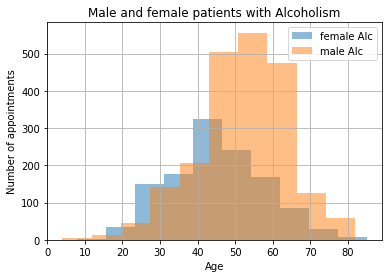

In [117]:
# histogram of female and male patients with alcoholism by Age

femaleAlc.Age.hist(alpha=0.5, label='female Alc')
maleAlc.Age.hist(alpha=0.5, label='male Alc')

plt.ylabel('Number of appointments')
plt.xlabel('Age')
plt.title("Male and female patients with Alcoholism")

plt.legend()

In [113]:
# to check proportion of Male and Female patients with Alcoholism who missed their appointments

femaleAlcNoShow = femaleAlc.query('NoShowInt == 1')
maleAlcNoShow = maleAlc.query('NoShowInt == 1')
"female Alc no Show", "{0:.2f}".format(femaleAlcNoShow.Age.count()/femaleAlc.Age.count()), "male Alc no Show", "{0:.2f}".format(maleAlcNoShow.Age.count()/maleAlc.Age.count())

('female Alc no Show', '0.25', 'male Alc no Show', '0.17')

Female with Alcoholism tend to miss more appointment then Male.

<a id="week"></a>
    
### Research Question 7 (Day of the week)

Let's check how day of the week affected missed appointments.

In [114]:
# to calculate number of missed appointments by day of the week

df.groupby('SchedWeekDay')['NoShowInt'].sum()

SchedWeekDay
Friday       3881
Monday       4552
Saturday        1
Thursday     3696
Tuesday      5277
Wednesday    4871
Name: NoShowInt, dtype: int64

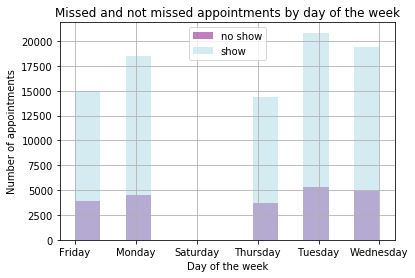

In [116]:
# to make a histogram of missed and not appointments by day of the week

df[notShownUp].SchedWeekDay.hist(alpha=0.5, bins = 12, color='purple', label = 'no show') # did not show up
df[shownUp].SchedWeekDay.hist(alpha=0.5, bins = 12, color='lightblue', label = 'show')
plt.ylabel('Number of appointments')
plt.xlabel('Day of the week')
plt.title("Missed and not missed appointments by day of the week")

plt.legend()

We see that the most appointments are missed at first half of the week from Monday through Wednesday. 


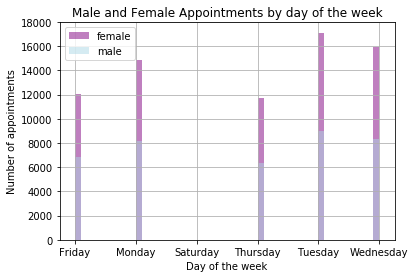

In [120]:
female.SchedWeekDay.hist(alpha=0.5, bins=50, color='purple', label = 'female') 
male.SchedWeekDay.hist(alpha=0.5, bins=50, color='lightblue', label = 'male')

plt.ylabel('Number of appointments')
plt.xlabel('Day of the week')
plt.title("Male and Female Appointments by day of the week")
plt.legend()

Men and Women have approximatelly the same proportion of appointments by day of the week.
There is no distinct and significant correlation between days of the week, gender and missed appointments.

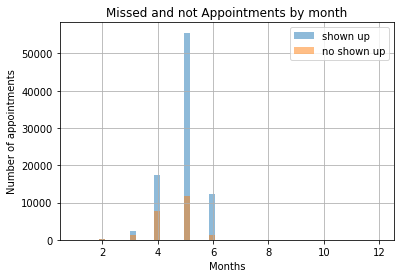

In [121]:
# to check missed and not appointments by month

df[df.NoShowInt==0].SchedMonth.hist(alpha=0.5, bins=50, label = 'shown up') # did  show up
df[df.NoShowInt==1].SchedMonth.hist(alpha=0.5, bins=50, label = 'no shown up') # didn't  show up

plt.ylabel('Number of appointments')
plt.xlabel('Months')
plt.title("Missed and not Appointments by month")
plt.legend()

Given that we have data only for 3 months and looks like only May (5) represented in full, we can't do any assumption about months influence on missed appointments.

<a id="hosp"></a>
    
### Research Question 8 (Hospital)

No let's check if any particular hospital location (neighbourhood) affects missed appointments.

In [122]:
# to check hospital and number of appointments for each

neighbourhood = df['Neighbourhood'].value_counts()
neighbourhood.head(1)


JARDIM CAMBURI    7717
Name: Neighbourhood, dtype: int64

In [125]:
# to check number of appointments for each hospital

total_nb = df.groupby('Neighbourhood').NoShowInt.count()
total_nb.head(5)

Neighbourhood
AEROPORTO                 8
ANDORINHAS             2255
ANTÔNIO HONÓRIO         271
ARIOVALDO FAVALESSA     282
BARRO VERMELHO          423
Name: NoShowInt, dtype: int64

In [126]:
# to check number of missed appointments for each hospital
noshow_nb = df.groupby('Neighbourhood').NoShowInt.sum()
noshow_nb.head(5)

Neighbourhood
AEROPORTO                1
ANDORINHAS             520
ANTÔNIO HONÓRIO         50
ARIOVALDO FAVALESSA     62
BARRO VERMELHO          91
Name: NoShowInt, dtype: int64

Now we'll check the proportion of missed appointments for each hospital.

In [127]:
# to check the proportion od missed appointments for each hospital

proportion_nb = noshow_nb/total_nb
proportion_nb.head(5)

Neighbourhood
AEROPORTO              0.125000
ANDORINHAS             0.230599
ANTÔNIO HONÓRIO        0.184502
ARIOVALDO FAVALESSA    0.219858
BARRO VERMELHO         0.215130
Name: NoShowInt, dtype: float64

No we'll sort hospitals with most missed appointments and check if it depended on Scholarship or other variables.

In [128]:
# sorting hospitals with highest rate of missed appointments

sorted_nb = proportion_nb.sort_values(ascending=False)
sorted_nb.head(10)

Neighbourhood
ILHAS OCEÂNICAS DE TRINDADE    1.000000
SANTOS DUMONT                  0.289639
SANTA CECÍLIA                  0.274554
SANTA CLARA                    0.265347
ITARARÉ                        0.262618
JESUS DE NAZARETH              0.243954
HORTO                          0.240000
ILHA DO PRÍNCIPE               0.232846
ANDORINHAS                     0.230599
CARATOÍRA                      0.230109
Name: NoShowInt, dtype: float64

In [135]:
# to check what is going on with hospital with 100% missed appointments
missedHosp = df.loc[df['Neighbourhood'] == 'ILHAS OCEÂNICAS DE TRINDADE']
missedHosp

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,...,No-show,SchedYear,SchedMonth,SchedDay,SchedWeekday,AppYear,AppMonth,AppDay,SchedWeekDay,NoShowInt
48754,F,2016-04-14 12:25:43,2016-05-13,51,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,...,Yes,2016,4,14,3,2016,5,13,Thursday,1
48765,F,2016-04-14 12:26:13,2016-05-13,58,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,...,Yes,2016,4,14,3,2016,5,13,Thursday,1


We see that there were only 2 appointments and both were missed so data looks reliable.

Grouping and counting `Scholarship` cases for each hospital.

In [136]:
# Grouping and counting Scholarship cases for each hospital.
schol_nb_sum = df.groupby('Neighbourhood').Scholarship.sum()
schol_nb_sum.head(5)

Neighbourhood
AEROPORTO                0
ANDORINHAS             323
ANTÔNIO HONÓRIO         14
ARIOVALDO FAVALESSA     52
BARRO VERMELHO           0
Name: Scholarship, dtype: int64

Let's check the proportion of missed appointments for each hospital for patients with scholarship.

In [137]:
# calculating proportion of missed appointments for each hospital for patients with scholarship

proportion_schol_nb = schol_nb_sum/total_nb
proportion_schol_nb.sort_values(ascending=False).head(5)

Neighbourhood
SÃO BENEDITO        0.280250
DO MOSCOSO          0.270073
ILHA DO PRÍNCIPE    0.256308
PIEDADE             0.254425
SANTOS REIS         0.219378
dtype: float64

Grouping and counting `Alcoholism` cases for each hospital.

In [138]:
# Grouping and counting Alcoholism cases for each hospital.

alc_nb_sum = df.groupby('Neighbourhood').Alcoholism.sum()
# schol_nb_count.sort_values(ascending=False).head(5)
alc_nb_sum.head(5)

Neighbourhood
AEROPORTO               0
ANDORINHAS             49
ANTÔNIO HONÓRIO         0
ARIOVALDO FAVALESSA    14
BARRO VERMELHO          2
Name: Alcoholism, dtype: int64

Let's check the proportion of missed appointments for each hospital for patients with alcoholistm.

In [139]:
# calculating the proportion of missed appointments for each hospital for patients with alcoholistm

proportion_alc_nb = alc_nb_sum/total_nb
proportion_alc_nb.sort_values(ascending=False).head(5)

Neighbourhood
ESTRELINHA      0.147388
DO MOSCOSO      0.131387
SANTA MARTHA    0.109219
PRAIA DO SUÁ    0.079501
DA PENHA        0.077828
dtype: float64

As we see Hospitals with highest levels of Diabetes and Alcoholism are not among Hospitals with highest missed appointments rate.
So we can't make a prediction on missed appointments based only on hospitals, we need to check the combination of all variables.

<a id='conclusions'></a>
## Conclusions

From the initial data we could see that:

- Average age is 37.09 yo,
- Scholarship mean is almost 0.1, so only 10% of patient had scholarship for medical insurance,
- Only 7% of people had Diabetes,
- 3% people had Alcoholism,
- Almost 20% had Hipertention,
So Hipertention is the most common medical condition among observed. 
- 32% of people received SMS,
- 2% patients Handicaped,
- at average 20% of patients missed their appointments.

As we see from queries men are 35% of patients and women are 65% of patients.
As we see despite different numbers of appointments for men and women the same proportion of men and women have missed their appointment: 0.2 . So unlikely this variable affect missed appointments.

Women's Age is almost normally distrubuted with mode at 40 years old. At histogram with missed appoinments we see that both men and women histogram are keeping their shape with female distribution getting narrow. It could be related with child bearing before mode age and some sickness after - will check for Diabetes and Hipertension later.


We see that missed SMS mostly affected patients at the beginning of the week and before 60 yo. There is the chance that after 60 people mostly relay on written reminders.
Yes, variable SMS affects missed appointments: 44% of patients received SMS have not shown up and 56% of patients who didn't receieved SMS not shown up.

Just as a reminder the proportion of missed appointments for men and women are:

'proportion men no show', '0.20', 'proportion female no show', '0.20'

As we see the proportion of male and female who had diabetes and missed their appointments (calculated for Diabetes patients) are less than total average for missed appointments (0.18 vs 0.2)

It's clear that Scholarship recipients with Diabetes almost never miss their appointments comparing to patients without Scholarship with Diabetes whose numbers are close to average missed appointments. In total Scholarship recepients tend to miss more appointments: 24% of Scholarship recipients have missed their appointments.

There are three times more Male patients with Alcoholism in % comparing to Female. Female patients with Alcoholism are normally distributed with mean 45.3 yo and mode 45yo while Male patients with Alcoholism are close to normal distribution but slightly negatively skewed with mean 52 yo and mode 63 yo

Female with Alcoholism tend to miss more appointment then Male.


We see that the most appointments are missed at first half of the week from Monday through Wednesday.

Men and Women miss approximatelly the same number of appointments. There is no distinct and significant correlation between days of the week, gender and missed appointments.

As we see Hospitals with highest levels of Diabetes and Alcoholism are not among Hospitals with highest missed appointments rate. So we can't make a prediction on missed appointments based only on hospitals, we need to check the combination of all variables.




## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [73]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0